In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np

In [4]:
USmap = True
if USmap:
    states = gpd.read_file('../tl_2022_us_state/tl_2022_us_state.shp')
else: # Testing options for PR maps specifically
    #states = gpd.read_file('PR_coastline/PR_coastline.shp') # doestn seem to show up the line?
    #states = gpd.read_file('tl_2022_72_place/tl_2022_72_place.shp')  # lots of little... counties? idk, weird. right lat/lon
    #states = gpd.read_file('stanford-xv279yj9196-shapefile/xv279yj9196.shp') # no line either . right lat/lon
    states = states.to_crs("EPSG:5070")


In [8]:
#datafile = r'ALLSetups_new_Puerto Rico.csv'
datafile = r'C:\Users\sayala\Box\AGRIPVWORLDPICKLES\ALLSetups_June7_Puerto Rico.csv'
data = pd.read_csv(datafile)


In [37]:
data['setup'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [44]:
daily = []

for setup in range(1, 6):
    df = data[(data['setup']==setup)]
    a = df.groupby('gid')['ghi_sum', 'insidemean'].sum()
    daily.append(list(a['insidemean']/a['ghi_sum']))
    gidlist = a.index


C:\Users\sayala\AppData\Local\Temp\1\ipykernel_21300\732027264.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.groupby('gid')['ghi_sum', 'insidemean'].sum()
C:\Users\sayala\AppData\Local\Temp\1\ipykernel_21300\732027264.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.groupby('gid')['ghi_sum', 'insidemean'].sum()
C:\Users\sayala\AppData\Local\Temp\1\ipykernel_21300\732027264.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.groupby('gid')['ghi_sum', 'insidemean'].sum()
C:\Users\sayala\AppData\Local\Temp\1\ipykernel_21300\732027264.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.groupby('gid')['ghi_sum', 'insidemean'].sum()
C:\U

Int64Index([1440111, 1441281, 1458833, 1460007, 1460008, 1461182, 1461183,
            1461184, 1461188, 1461189,
            ...
            1506567, 1507775, 1507778, 1510212, 1511432, 1512652, 1513871,
            1515089, 1516307, 1517519],
           dtype='int64', name='gid', length=472)

In [65]:
type(daily)
df = pd.DataFrame(daily)

In [66]:
df = df.T
df.columns = ['Setup1', 'Setup2', 'Setup3', 'Setup4', 'Setup5']

In [67]:
df.index = gidlist

In [68]:
df

,Setup1,Setup2,Setup3,Setup4,Setup5
gid,,,,,
1440111,0.631809,0.570947,0.741316,0.780096,0.846942
1441281,0.618324,0.553322,0.760846,0.774576,0.842541
1458833,0.631090,0.557708,0.771654,0.789428,0.852971
1460007,0.629657,0.580484,0.761673,0.776741,0.843659
1460008,0.588407,0.524686,0.749321,0.760179,0.833715
...,...,...,...,...,...
1512652,0.649473,0.584972,0.781152,0.800911,0.861474
1513871,0.609003,0.540019,0.757641,0.771159,0.841640
1515089,0.609313,0.539554,0.758538,0.771631,0.841984


In [69]:
latslons = data.groupby('gid')['latitude','longitude'].mean()

C:\Users\sayala\AppData\Local\Temp\1\ipykernel_21300\3304058340.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latslons = data.groupby('gid')['latitude','longitude'].mean()


In [70]:
df['latitude'] = latslons['latitude']
df['longitude'] = latslons['longitude']

In [71]:
df.keys()

Index(['Setup1', 'Setup2', 'Setup3', 'Setup4', 'Setup5', 'latitude',
       'longitude'],
      dtype='object')

In [116]:
testbeds = ['Setup1', 'Setup2', 'Setup3', 'Setup4', 'Setup5']

In [118]:
vmin = np.round(df[testbeds].min().min(),2)
vmax = np.round(df[testbeds].max().max(),2)

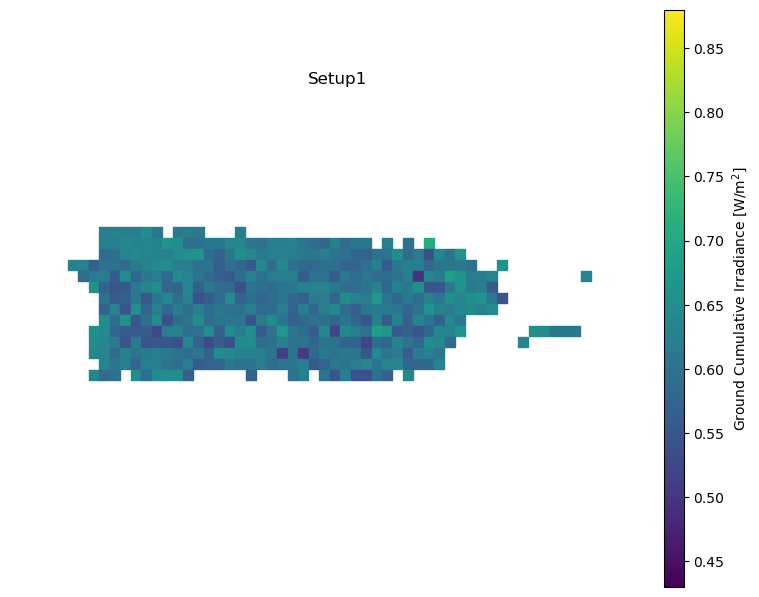

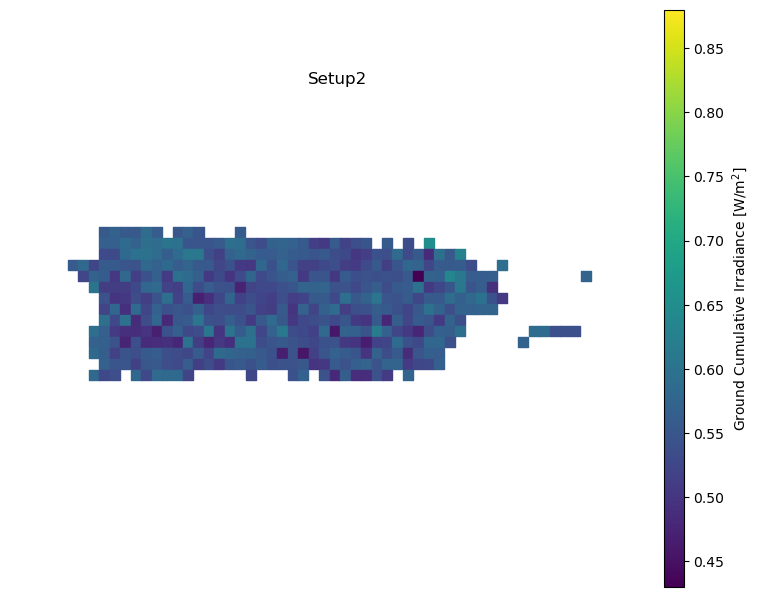

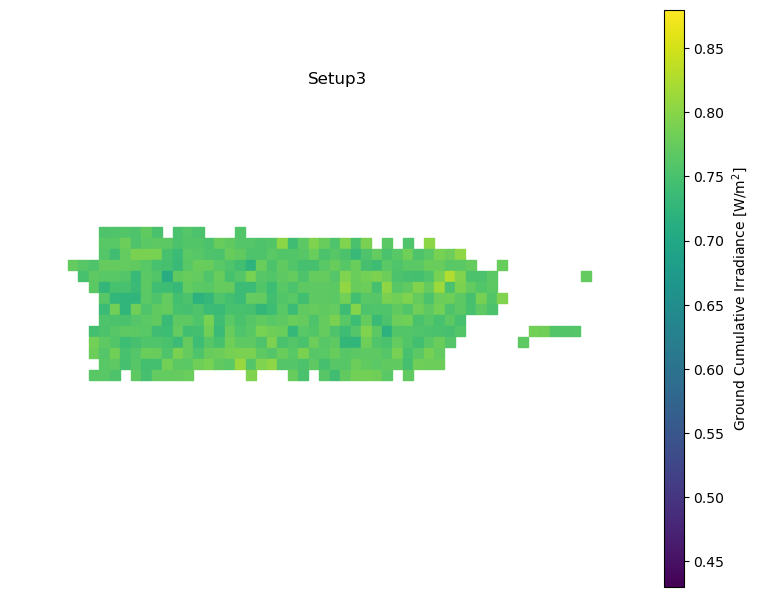

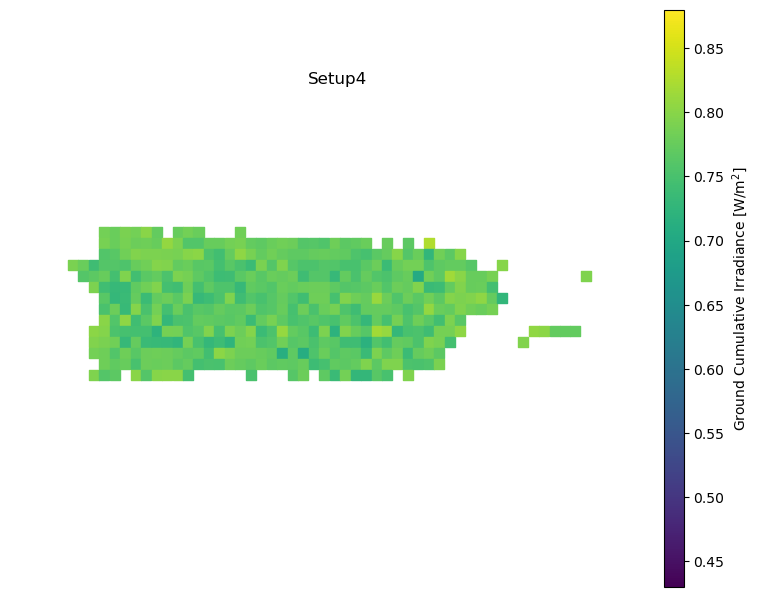

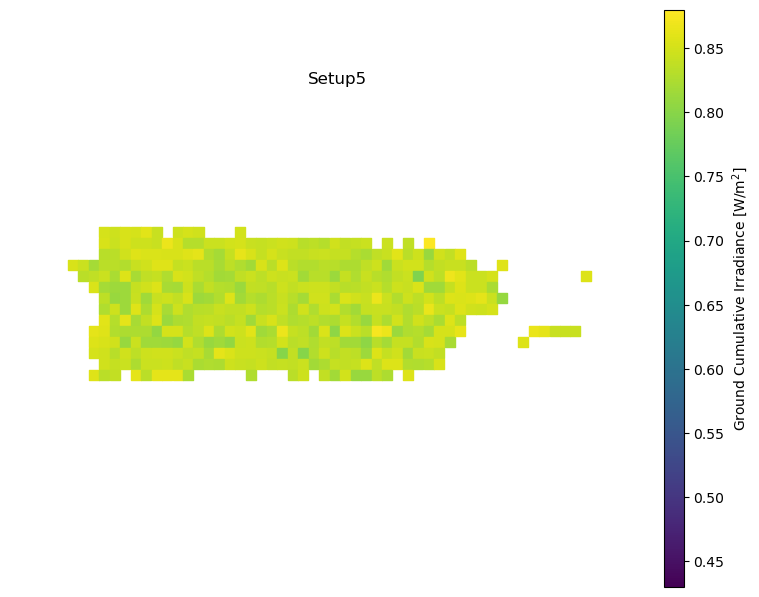

In [121]:
# create an axis with 2 insets − this defines the inset sizes

for testbed in testbeds:

    geo_conti = gpd.GeoDataFrame(df[testbed], 
                     geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])],
                     crs = CRS('EPSG:4326')).to_crs(states.crs)


    fig, continental_ax = plt.subplots(figsize=(8, 8))


    # Set bounds to fit desired areas in each plot
    #continental_ax.set_xlim(3E6, 3.4E6)
    continental_ax.set_xlim(-67.5, -65)
    continental_ax.set_ylim(17.5, 19)
    continental_ax.axis('off')

    # Plot the data per area - requires passing the same choropleth parameters to each call
    # because different data is used in each call, so automatically setting bounds won’t work

    #vmin = 200.0
    #vmax = 600.0

    bound_plot = {'color':'gray', 'lw':0.75 }

    #states.boundary.plot(ax=continental_ax, **bound_plot)


    cont_plot = {'column':testbed, 'cmap':'viridis', 'marker': 's', 'markersize': 52, 'facecolor': 'b',
                 'vmin':vmin, 'vmax':vmax} #
    legend_kwds={'shrink':0.75, 'drawedges':False, 'label':'Ground Cumulative Irradiance [W/m$^2$]', #'ticks': np.linspace(0,15, 16), 
                 'pad':0, 'aspect':30}

    geo_conti.plot(ax=continental_ax, legend=True, legend_kwds=legend_kwds, **cont_plot)

    #continental_ax.set_title('Ground Irradiance Testbed C in June', fontsize=20, y=0.95)

    plt.title(testbed)
    plt.tight_layout()
    #plt.savefig('AgriPV_TestbedC_June.png', dpi=600)